# Machine Learning Prototype
SALMAN SHAH | SPRINGBOARD

## Brief Overview
The goal of this notebook is to demonstrate the viability of the a convolutional neural network to solve a single image super resolution problem.

### Problem Statement
Recall that the project is a super-resolution project—meaning that we would like to build a model that takes an image as an input and outputs another image that is 2x the size in each dimension and is the high-res equivalent of the same image.

### Dataset
Though I've built a dataset from scraping the images from google images, the model's viability can be demonstrated through any standard color image dataset. Hence, for practicality, I will simply preprocess the `cifar10` dataset to suit our problem. This approach has the advantage because the images are small (32x32 pixels) and, hence, the model can be trained pretty quickly.

We need a dataset that consists of a set images X of a fixed dimension *i* x *j* and another set Y of the same images that are size *(1/2)i* x *(1/2)j*. We can use X as our input data and Y to compute the loss of our data.

## Selected Prototype
### Loading Data

In [1]:
import tensorflow as tf
import numpy as np
import cv2

(x_train_original, y_train_original), (x_test_original, y_test_original) = tf.keras.datasets.cifar10.load_data()

Y = np.concatenate((x_train_original, x_test_original), axis=0)
Y = Y.astype('float32')
Y /= 255
X = []
for image in Y:
    X.append(cv2.resize(image, (16,16)))
X = np.asarray(X)

print("Finished loading X and Y.")

170500096/170498071 [==============================] - 13s 0us/step
Finished loading X and Y.


### Splitting into training and test data

In [2]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# dataset info
print('Training Data')
print('x_train:', x_train.shape)
print('y_train:', y_train.shape, '\n')
print('Test Data')
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

Training Data
x_train: (48000, 16, 16, 3)
y_train: (48000, 32, 32, 3) 

Test Data
x_test: (12000, 16, 16, 3)
y_test: (12000, 32, 32, 3)


### Visualizing a data point
The example below shows an image of a horse and its low resolution equivalent

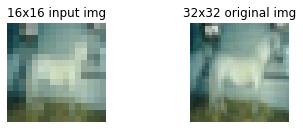

In [3]:
import matplotlib.pyplot as plt

# Example image from dataset
plt.subplot(221)
plt.imshow(x_train[0])
plt.title('16x16 input img')
plt.axis('off')
plt.subplot(222)
plt.imshow(y_train[0])
plt.title('32x32 original img')
plt.axis('off')
plt.show()

### Building the Model

In [4]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import UpSampling2D
from tensorflow.keras.layers import Activation

# hyperparameters
num_epochs = 30
batch_size = 64
num_filters = 32
num_pool = 2
optimizer = tf.keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)

# model configuration
model = tf.keras.models.Sequential()
model.add(Conv2D(num_filters, (3,3), padding='same', input_shape=(16,16,3)))
model.add(Activation('relu'))
model.add(UpSampling2D(size=(2,2)))
model.add(Activation('relu'))
model.add(Conv2D(num_filters * 2, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(num_filters * 4, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(3, (1,1), padding='same'))

# print model architecture
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 16, 16, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 16, 16, 32)        0         
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 64)        0         
_________________________________________

### Compile and Fit

In [0]:
model.compile(loss='mse', optimizer=optimizer, metrics=['accuracy'])

In [6]:
hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=num_epochs, verbose=1, validation_data=(x_test, y_test))

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 19s 406us/sample - loss: 0.0112 - acc: 0.7542 - val_loss: 0.0026 - val_acc: 0.8553
Epoch 2/30
48000/48000 [==============================] - 13s 274us/sample - loss: 0.0025 - acc: 0.8606 - val_loss: 0.0024 - val_acc: 0.8633
Epoch 3/30
48000/48000 [==============================] - 13s 271us/sample - loss: 0.0024 - acc: 0.8747 - val_loss: 0.0023 - val_acc: 0.8839
Epoch 4/30
48000/48000 [==============================] - 13s 272us/sample - loss: 0.0023 - acc: 0.8816 - val_loss: 0.0023 - val_acc: 0.8839
Epoch 5/30
48000/48000 [==============================] - 13s 270us/sample - loss: 0.0023 - acc: 0.8858 - val_loss: 0.0023 - val_acc: 0.9022
Epoch 6/30
48000/48000 [==============================] - 13s 272us/sample - loss: 0.0022 - acc: 0.8888 - val_loss: 0.0022 - val_acc: 0.8783
Epoch 7/30
48000/48000 [==============================] - 13s 272us/sample - loss: 0.0022 - acc: 0.8912 

### Plotting accuracy and loss
Steady decrease in of training and validation loss indicates that the model is not overfitting.

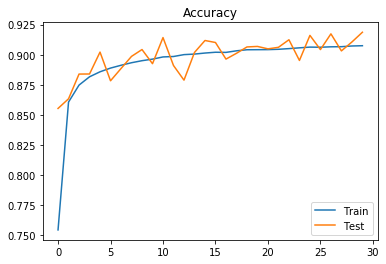

In [7]:
# plot accuracy over epochs
acc = hist.history['acc']
val_acc = hist.history['val_acc']

plt.plot(acc, label='Train')
plt.plot(val_acc, label='Test')
plt.title('Accuracy')
plt.legend()
plt.show()

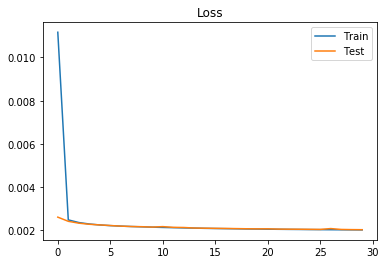

In [8]:
# plot loss over epochs
loss = hist.history['loss']
val_loss = hist.history['val_loss']

plt.plot(loss, label='Train')
plt.plot(val_loss, label='Test')
plt.title('Loss')
plt.legend()
plt.show()

### Plotting Results

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


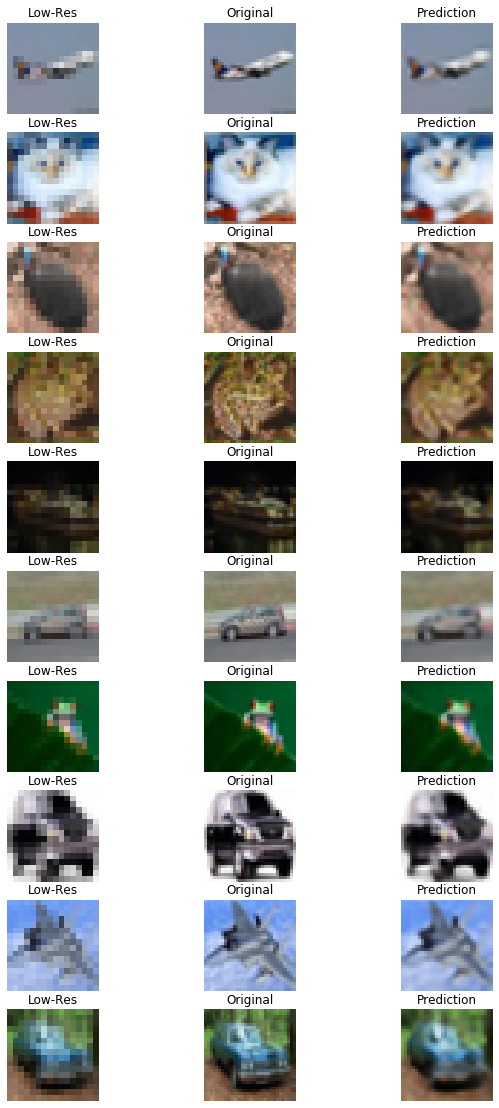

In [11]:
# plot some results
j = 5 # staring index
plt.figure(figsize=(10,40))

for i in range(j, j+30, 3):
    plt.subplot(20, 3, i-j+1)
    plt.imshow(x_test[i])
    plt.axis('off')
    plt.title('Low-Res')
    plt.subplot(20, 3, i-j+2)
    plt.imshow(y_test[i])
    plt.axis('off')
    plt.title('Original')
    plt.subplot(20, 3, i-j+3)
    prediction = model.predict(x_test[i:i+1])
    plt.imshow(prediction[0])
    plt.axis('off')
    plt.title('Prediction')

plt.show()

### Conclusion
As we can observe, the accuracy we can achieve through this method is around 90% and the predictions appear to be quite a bit better than the low-res versions. This indicates that this model is viable and can perform well once it has been scaled up and optimized.